In [21]:
import numpy as np 
import pandas as pd


In [22]:
df = pd.read_csv(r"C:\Users\Asus\AppData\Local\Temp\e07f19f4-c269-45c2-af3b-847f2407c831_archive.zip.831\Churn_Modelling.csv")

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [25]:
df.info

<bound method DataFrame.info of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember

In [26]:
df.duplicated().sum()

0

In [27]:
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [28]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [29]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [32]:
print(df.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [34]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [35]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [36]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [38]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [41]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [42]:
X_train.shape

(8000, 11)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [45]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8271 - loss: 0.4039 - val_accuracy: 0.8188 - val_loss: 0.4207
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8229 - loss: 0.4128 - val_accuracy: 0.8213 - val_loss: 0.4185
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8260 - loss: 0.4081 - val_accuracy: 0.8244 - val_loss: 0.4168
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.4136 - val_accuracy: 0.8231 - val_loss: 0.4154
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8199 - loss: 0.4201 - val_accuracy: 0.8256 - val_loss: 0.4133
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.4231 - val_accuracy: 0.8269 - val_loss: 0.4119
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.3979 - val_accuracy: 0.8300 - val_loss: 0.4100
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3931 - val_accuracy: 0.

In [53]:
model.layers[0].get_weights()

[array([[-9.42403525e-02, -3.23154390e-01, -2.63465434e-01,
          1.14233047e-01, -2.03606561e-01,  8.17740858e-02,
         -1.50523052e-01,  2.78447568e-01, -3.04154873e-01,
         -9.08510759e-02,  1.73047081e-01],
        [ 9.29556042e-02,  1.37209296e+00,  2.14138198e+00,
         -1.74448633e+00, -1.75604248e+00,  2.22532082e+00,
          6.43372163e-02, -4.96473014e-02, -1.02389999e-01,
         -5.15755057e-01, -8.54929149e-01],
        [-1.05677798e-01,  2.43399814e-01,  1.61652505e-01,
         -9.28950384e-02, -3.30318846e-02, -1.81327143e-03,
          1.13197424e-01,  2.64241904e-01, -1.65007830e-01,
          4.08371061e-01, -1.14359528e-01],
        [-7.83991367e-02,  2.06464678e-01, -1.12215601e-01,
          2.07099527e-01, -1.60276052e-02,  1.96980312e-01,
         -3.39655042e-01, -3.99097614e-02,  1.85689986e-01,
          2.97268033e-01, -5.30869305e-01],
        [-2.08731699e+00,  2.08570570e-01,  9.67089161e-02,
          6.84740245e-01, -1.42594337e-01,  

In [54]:
model.layers[1].get_weights()

[array([[-8.8711953e-01, -4.1085866e-01, -5.6689316e-01,  8.2607307e-02,
          1.0178709e+00, -6.3863474e-01, -5.5925298e-01, -6.9627577e-01,
         -7.9464144e-01,  6.8295157e-01,  3.6596218e-01],
        [-6.9517575e-02, -3.1358948e-01, -1.3524203e-01,  3.7358102e-01,
          3.4741870e-01, -4.0479562e-01,  3.1670806e-01, -1.4202094e-01,
          1.9170889e-01,  3.8072404e-01, -1.4503732e-01],
        [-7.6648492e-01, -5.3372318e-01,  8.5973538e-02,  3.9070356e-01,
          5.8716220e-01,  9.3285695e-02, -3.3810017e-01, -5.0519556e-01,
         -6.7415375e-01,  2.0444953e-01,  1.1438396e-01],
        [ 6.5094805e-01,  3.8232976e-01,  4.4474995e-01, -7.7740654e-02,
         -3.2199612e-01,  3.6439162e-01,  2.3761041e-01, -8.2236633e-02,
          9.0820128e-01, -7.1337748e-01, -4.3289098e-01],
        [ 7.4615932e-01,  7.4836665e-01,  6.4788753e-01, -8.9916164e-01,
         -1.6112202e-01, -9.1635302e-02,  2.7230683e-01,  5.8062428e-01,
          2.6517767e-01, -5.0850725e-0

In [62]:
y_log = model.predict(X_train_trf)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [64]:
y_log

array([[0.1275683 ],
       [0.3327814 ],
       [0.17212608],
       ...,
       [0.08605302],
       [0.08251282],
       [0.726297  ]], dtype=float32)

In [65]:
y_pred=np.where(y_log>0.5,1,0)

In [66]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [72]:
import numpy as np
from sklearn.metrics import accuracy_score

# Ensure X_test is a numpy array and convert to float32 if necessary
X_test = np.array(X_test)
if X_test.dtype != 'float32':
    X_test = X_test.astype('float32')

# Ensure y_test is a numpy array
y_test = np.array(y_test)

# Make predictions
y_pred = model.predict(X_test)

# If the model outputs probabilities, convert them to class labels
# Assuming a binary classification for simplicity; adjust for multi-class
if y_pred.shape[-1] > 1:
    y_pred = np.argmax(y_pred, axis=1)
else:
    y_pred = (y_pred > 0.5).astype("int32")

# Verify lengths again after prediction
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Calculate accuracy score if lengths match
if len(y_test) == len(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
else:
    print("Error: y_test and y_pred lengths do not match.")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Length of y_test: 2000
Length of y_pred: 2000
Accuracy: 0.7975


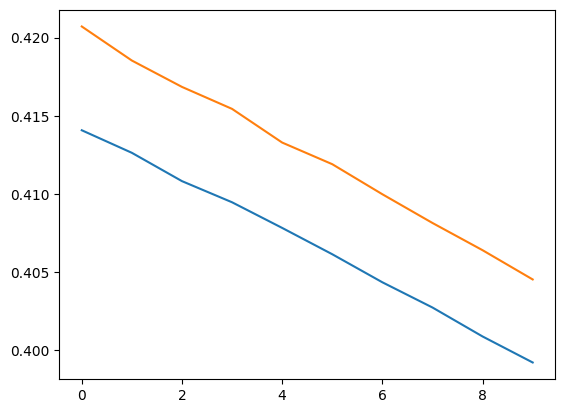

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

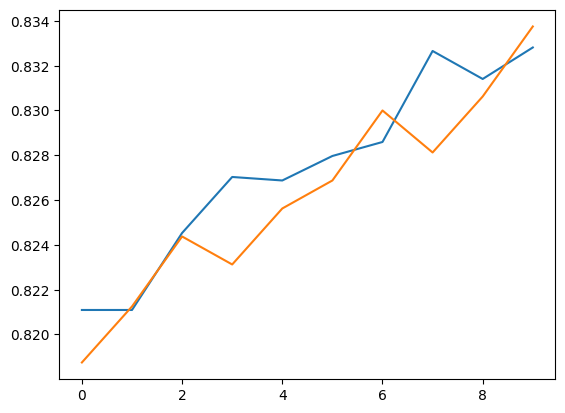

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [76]:
history.history

{'accuracy': [0.821093738079071,
  0.821093738079071,
  0.8245312571525574,
  0.8270312547683716,
  0.8268749713897705,
  0.8279687762260437,
  0.8285937309265137,
  0.8326562643051147,
  0.8314062356948853,
  0.832812488079071],
 'loss': [0.4140703082084656,
  0.41262659430503845,
  0.4108158051967621,
  0.4094633162021637,
  0.4078231751918793,
  0.4061395227909088,
  0.4043458104133606,
  0.4027326703071594,
  0.40088051557540894,
  0.3992171585559845],
 'val_accuracy': [0.8187500238418579,
  0.8212500214576721,
  0.8243749737739563,
  0.8231250047683716,
  0.8256250023841858,
  0.8268749713897705,
  0.8299999833106995,
  0.828125,
  0.8306249976158142,
  0.8337500095367432],
 'val_loss': [0.42070794105529785,
  0.41852933168411255,
  0.4168427586555481,
  0.41543665528297424,
  0.41328299045562744,
  0.4118990898132324,
  0.40997686982154846,
  0.40813973546028137,
  0.4063979387283325,
  0.404527872800827]}